In [1]:
import sqlite3
import pandas as pd
df=pd.read_csv(r"C:\Users\Abhi Singh Yadav\OneDrive\Documents\Internship Elevate Labs\Task7(14-08-2025)\Sales.csv")
connection=sqlite3.connect('Sales_db')
cursor=connection.cursor()

In [2]:
df.to_sql("Sales", connection,if_exists="replace",index=False)
print(pd.read_sql_query("select * from Sales",connection))
connection.close()

            order_id     product_name  order_date  quantity  price
0     CA-2016-152156        Furniture  11-08-2016         2    262
1     CA-2016-152156        Furniture  11-08-2016         3    732
2     CA-2016-138688  Office Supplies  06-12-2016         2     15
3     US-2015-108966        Furniture  10-11-2015         5    958
4     US-2015-108966  Office Supplies  10-11-2015         2     22
...              ...              ...         ...       ...    ...
9989  CA-2014-110422        Furniture   1/21/2014         3     25
9990  CA-2017-121258        Furniture   2/26/2017         2     92
9991  CA-2017-121258       Technology   2/26/2017         2    259
9992  CA-2017-121258  Office Supplies   2/26/2017         4     30
9993  CA-2017-119914  Office Supplies  05-04-2017         2    243

[9994 rows x 5 columns]


In [26]:
connection=sqlite3.connect("Sales_db")
query = """SELECT product_name, SUM(quantity) AS total_qty, SUM(quantity * price) AS
revenue FROM sales GROUP BY product_name"""
df=pd.read_sql_query(query,connection)
print(df)

      product_name  total_qty  revenue
0  Air Conditioner        225   108953
1        Furniture       7803  3750221
2           Laptop       1244   187204
3  Office Supplies      18789  2954403
4     Refrigirator       1339   156142
5      Smart Phone        427   186689
6       Stationery       1534   251090
7           Tablet        432   288612
8       Technology       6080  3605258


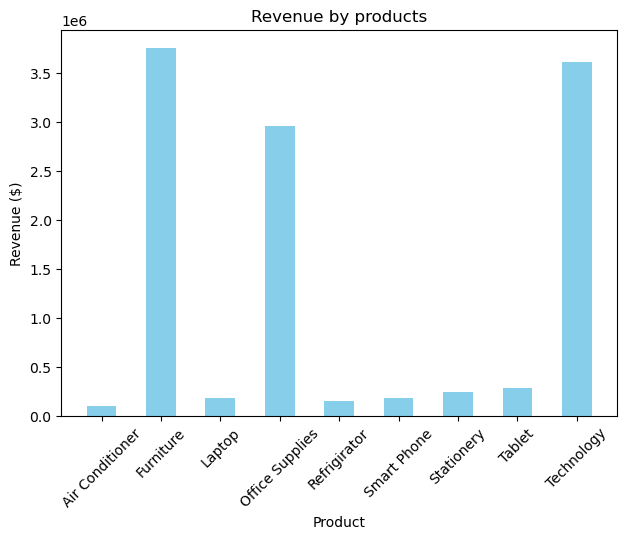

<Figure size 2500x5000 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
plt.bar(df["product_name"],df["revenue"],color="skyblue",width=0.5)
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.title("Revenue by products")
plt.tight_layout()
plt.xticks(rotation=45) 
plt.figure(figsize=(25,50))
plt.savefig("sales_chart.png")
plt.show()
connection.close()

In [28]:
# Product having Highest Revenue
connection=sqlite3.connect("Sales_db")
query2="""select product_name,SUM(quantity * price) AS revenue
from Sales order by revenue desc limit 1"""
df2=pd.read_sql_query(query2,connection)
print(df2)
connection.close()

  product_name   revenue
0    Furniture  11488572


In [ ]:
#Furniture are most revenue generated product in the company